In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
# from scipy.interpolate import CubicSpline
from scipy.interpolate import CubicSpline
from matplotlib.ticker import ScalarFormatter
from matplotlib import pyplot as plt
from tqdm import tqdm
# from numba import njit, jit
import json

import sys
sys.path.append("./../src")
import scripts as plot_scripts  # plotting functions
plot_scripts.setup_rc_params()


path_to_exact_data = "./../testData/"
path_to_emulated_data = "./../Results/Quarkies/"

In [3]:
# define some useful figure things
dpi = 1200
figsize = (7, 5)
save_figures = True
save_location = "./../Plots"

tov_alpha = 0.8
dmd_alpha = 0.6
res_alpha = 0.6
# tov_alpha = 1.0
# dmd_alpha = 0.4
# res_alpha = 0.3
scatter_size = 20
tick_size = 24
axis_label_size = 24
res_axis_label_size = 18
tov_linewidth = 2
dmd_dot_size = 30
res_linewidth = 3
title_size = 24

legend_size = 15.47

res_width = "49%"
res_height = 2.3

In [4]:
exact_solutions = []
emulated_solutions = []
parameters = []

file_path = sorted(os.listdir(path_to_exact_data))
for file in file_path:
    if file[-4:] == ".dat":
        file_parameters = file.strip(".dat").split("_")[2:4]
        # if file_parameters in parameters:
        parameters.append(file_parameters)
        data = np.loadtxt(f"{path_to_exact_data}{file}")  # load the data)
        exact_solutions.append(data)
exact_solutions = np.array(exact_solutions)


file_path = sorted(os.listdir(path_to_emulated_data))
for file in file_path:
    if file[-4:] == ".dat":
        file_parameters = file.strip(".dat").split("_")[2:4]  # also grab the parameters 
        if file_parameters in parameters:
            with open(f"{path_to_emulated_data}{file}") as f:
                data = json.load(f)["Xdmd"]
            emulated_solutions.append(data)
        # parameters.append(file_parameters)
emulated_solutions = np.array(emulated_solutions)

# for convenience
exact_solutions = np.transpose(exact_solutions, (0, 2, 1))
# emulated_solutions = np.transpose(emulated_solutions, (0, 2, 1))

# parameters
exact_solutions.shape, emulated_solutions.shape

((9, 4, 50), (9, 4, 50))

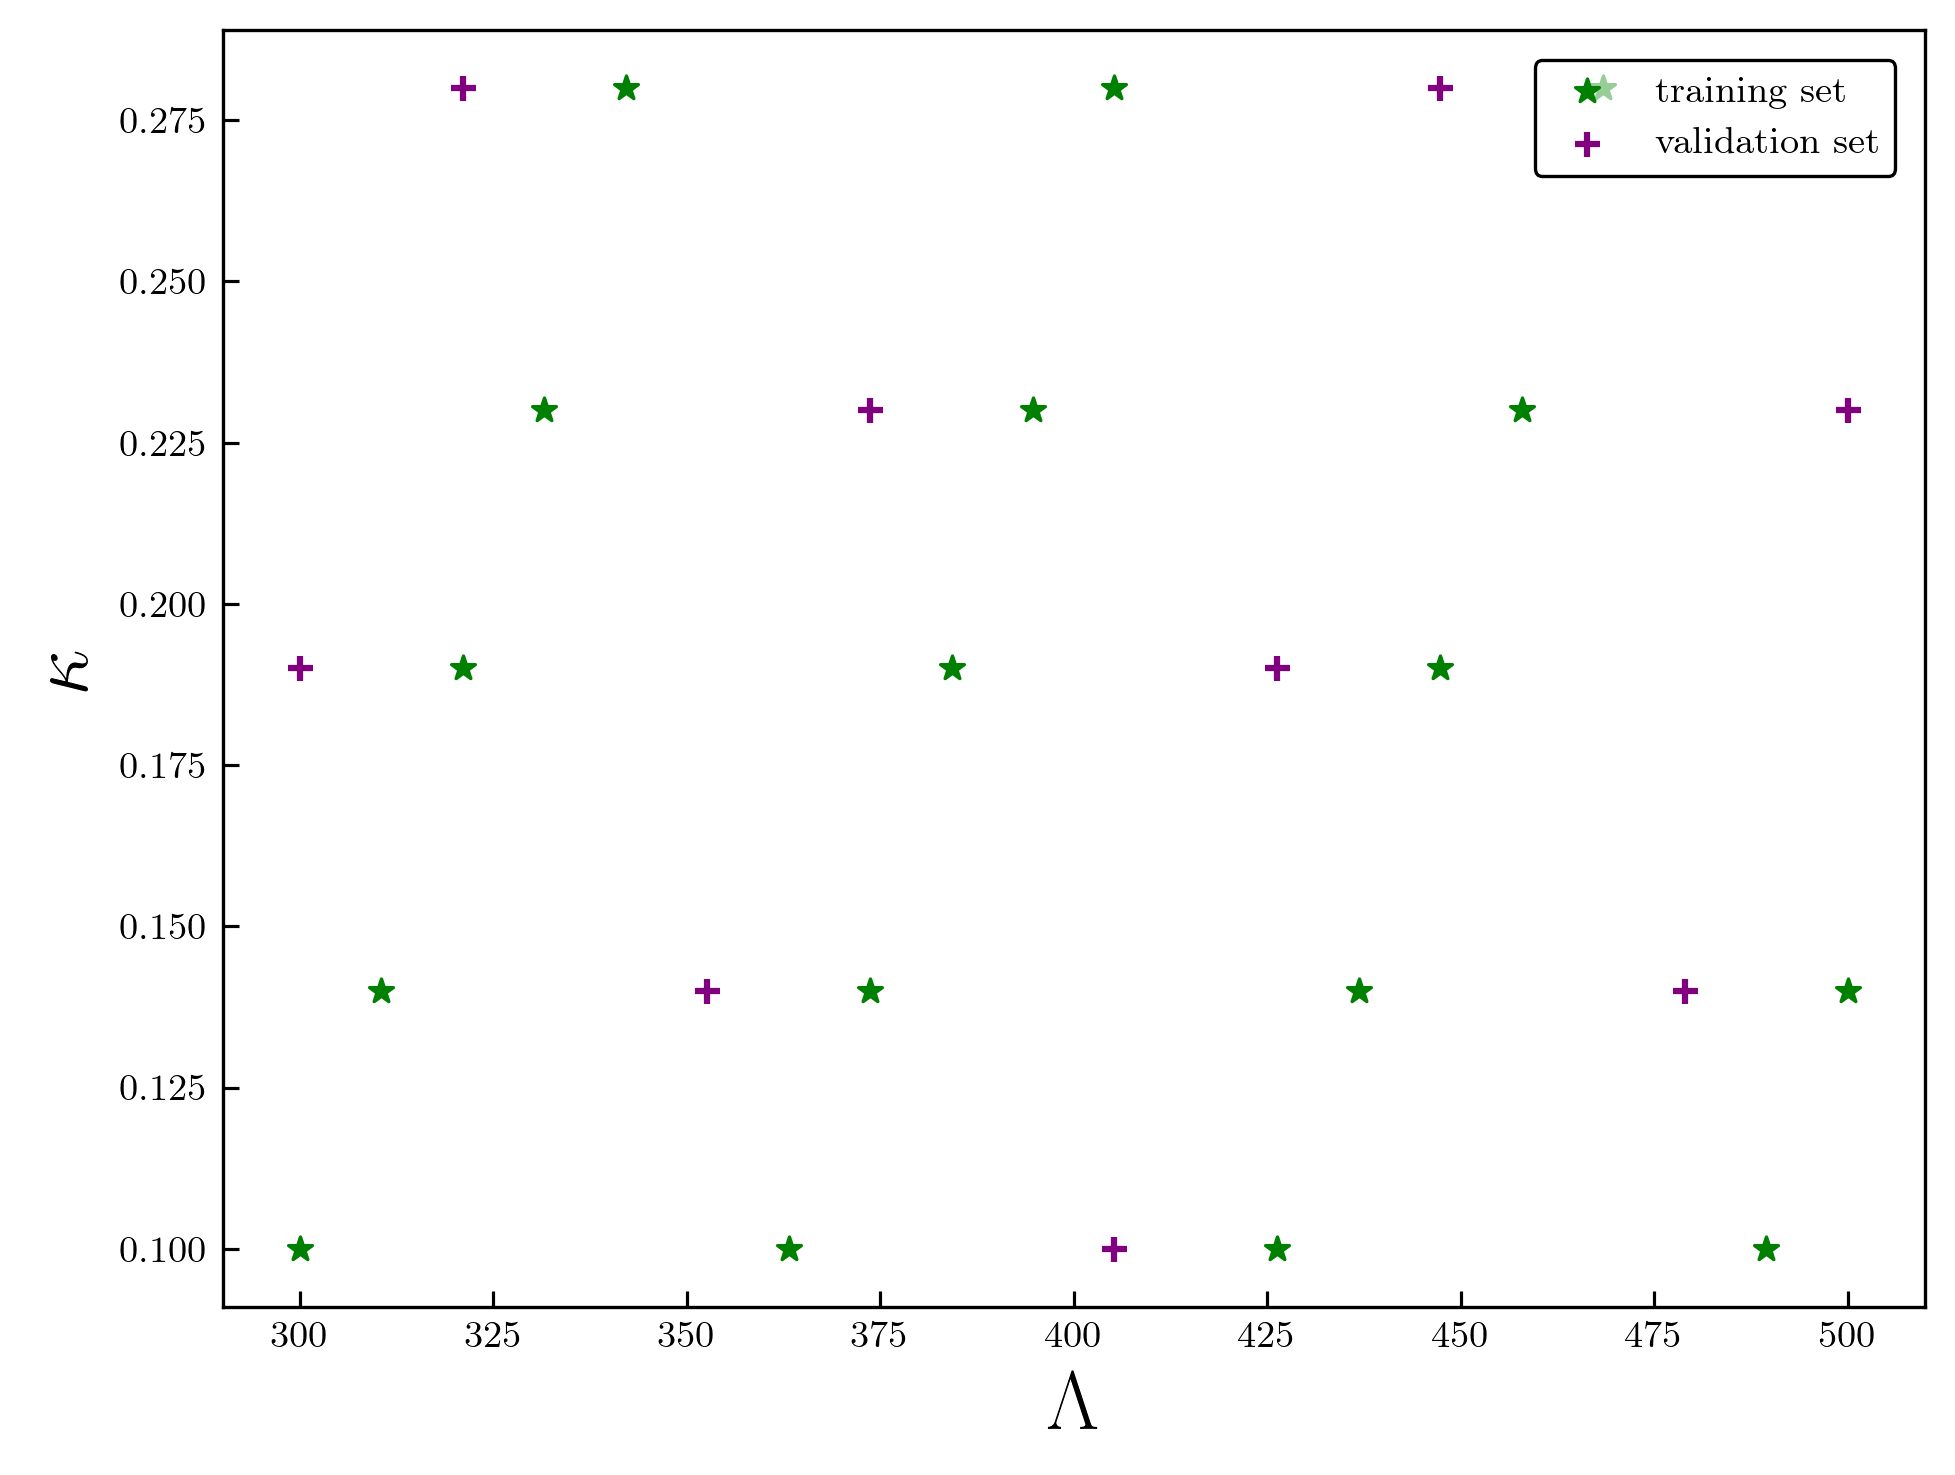

In [5]:
training_set = ['MR_Quarkyonia_300.00_0.10.dat', 'MR_Quarkyonia_310.53_0.14.dat', 'MR_Quarkyonia_321.05_0.19.dat', 'MR_Quarkyonia_331.58_0.23.dat', 'MR_Quarkyonia_342.11_0.28.dat', 'MR_Quarkyonia_363.16_0.10.dat', 'MR_Quarkyonia_373.68_0.14.dat', 'MR_Quarkyonia_384.21_0.19.dat', 'MR_Quarkyonia_394.74_0.23.dat', 'MR_Quarkyonia_405.26_0.28.dat', 'MR_Quarkyonia_426.32_0.10.dat', 'MR_Quarkyonia_436.84_0.14.dat', 'MR_Quarkyonia_447.37_0.19.dat', 'MR_Quarkyonia_457.89_0.23.dat', 'MR_Quarkyonia_468.42_0.28.dat', 'MR_Quarkyonia_489.47_0.10.dat', 'MR_Quarkyonia_500.00_0.14.dat']
validation_set = ['MR_Quarkyonia_300.00_0.19.dat', 'MR_Quarkyonia_321.05_0.28.dat', 'MR_Quarkyonia_352.63_0.14.dat', 'MR_Quarkyonia_373.68_0.23.dat', 'MR_Quarkyonia_405.26_0.10.dat', 'MR_Quarkyonia_426.32_0.19.dat', 'MR_Quarkyonia_447.37_0.28.dat', 'MR_Quarkyonia_478.95_0.14.dat', 'MR_Quarkyonia_500.00_0.23.dat']

training_parameters = []
for file in training_set:
    file_parameters = file.strip(".dat").split("_")[2:4]
    training_parameters.append(file_parameters)

validation_parameters = []
for file in validation_set:
    file_parameters = file.strip(".dat").split("_")[2:4]
    validation_parameters.append(file_parameters)

plt.figure(dpi=300)
i = 0
for lambda_value, kappa_value in training_parameters:
    lambda_value = eval(lambda_value)
    kappa_value = eval(kappa_value)
    if i == 0:
        plt.scatter(lambda_value, kappa_value, color="green", marker="*", label="training set")
    else:
        plt.scatter(lambda_value, kappa_value, color="green", marker="*")
    i += 1
i = 0
for lambda_value, kappa_value in validation_parameters:
    lambda_value = eval(lambda_value)
    kappa_value = eval(kappa_value)
    if i == 0:
        plt.scatter(lambda_value, kappa_value, color="purple", marker="+", label="validation set")
    else:
        plt.scatter(lambda_value, kappa_value, color="purple", marker="+")
    i += 1

plt.xlabel(r"$\Lambda$", fontsize=20)
plt.ylabel(r"$\kappa$", fontsize=20)
plt.legend(loc="upper right")
plt.show()

In [6]:
# nice_lines = np.array([1, 9, 30, 33, 44, 53, 64, 74])

In [7]:
# i = 0
# for lambda_parameter, kappa_parameter in np.sort(parameters):
#     lambda_parameter = eval(lambda_parameter)
#     kappa_parameter = eval(kappa_parameter)
#     plt.scatter(lambda_parameter, kappa_parameter, color="orange", marker="o", s=40, alpha=0.4, zorder=1)
    
#     # if i in nice_lines:
#     #     plt.scatter(lambda_parameter, kappa_parameter, color="red", marker="*", s=100, zorder=3)
    
#     i += 1

# for lambda_parameter, kappa_parameter in np.sort(training_parameters):
#     lambda_parameter = eval(lambda_parameter)
#     kappa_parameter = eval(kappa_parameter)
#     plt.scatter(lambda_parameter, kappa_parameter, color="blue", marker="*", s=20, alpha=0.3, zorder=2)
# plt.xlabel("$\kappa$")
# # plt.xlim(0.2 - 2e-3, 0.3 + 2e-3)
# plt.ylabel("$\Lambda$")
# # plt.ylim(400 - 2, 500 + 2)

# # plt.scatter(1e6, 1e6, color="orange", marker="o", s=40, alpha=0.4, label="pSLM point")
# # plt.scatter(1e6, 1e6, color="blue", marker="*", s=20, alpha=0.3, label="TOV point")

# # plt.legend()
# plt.show()

In [8]:
# let's grab the good interpolator from the three panel plot code

def the_good_interpolator(x_tov, y_tov, x_dmd):
    # Create a normalized parameter t that corresponds to the original x values
    t_original = np.linspace(0, 1, num=len(x_tov))

    # Create cubic splines for original x and y
    cs_x = CubicSpline(t_original, x_tov, bc_type='natural')
    cs_y = CubicSpline(t_original, y_tov, bc_type='natural')

    # Create a new parameter t for the new x-values
    t_new = np.linspace(0, 1, num=len(x_dmd))

    # Interpolate to find the corresponding y-values for the new x-values
    y_new = cs_y(t_new)

    return x_dmd, y_new

In [9]:
def add_subplot_axes(ax,rect,axisbg='w'):
    fig = plt.gcf()
    box = ax.get_position()
    width = box.width
    height = box.height
    inax_position  = ax.transAxes.transform(rect[0:2])
    transFigure = fig.transFigure.inverted()
    infig_position = transFigure.transform(inax_position)
    x = infig_position[0]
    y = infig_position[1]
    width *= rect[2]
    height *= rect[3]  # <= Typo was here
    #subax = fig.add_axes([x,y,width,height],facecolor=facecolor)  # matplotlib 2.0+
    subax = fig.add_axes([x,y,width,height],axisbg=axisbg)
    x_labelsize = subax.get_xticklabels()[0].get_size()
    y_labelsize = subax.get_yticklabels()[0].get_size()
    x_labelsize *= rect[2]**0.5
    y_labelsize *= rect[3]**0.5
    subax.xaxis.set_tick_params(labelsize=x_labelsize)
    subax.yaxis.set_tick_params(labelsize=y_labelsize)
    return subax

def make_the_axes_look_nice(axis):
    axis.tick_params(which='minor', length=2)
    axis.tick_params(bottom=True, labelbottom=True,
                    top=True, labeltop=False,
                    right=True, labelright=False,
                    left=True, labelleft=True)
    axis.xaxis.set_tick_params(labelsize=tick_size / 1.5)
    axis.xaxis.set_minor_locator(plot_scripts.AutoMinorLocator())  # get minor ticks on x-axis
    axis.xaxis.set_ticks_position('both')  # get minor ticks on top and bottom sides
    axis.yaxis.set_tick_params(labelsize=tick_size / 1.5)
    axis.yaxis.set_ticks_position('both')  # get minor ticks on left and right sides

In [10]:
exact_solutions.shape[0]

9

In [27]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.rcParams['text.usetex'] = True

# lines = np.arange(exact_solutions.shape[0])

lines = np.array([0, 2, 4, 6, 8])

min_R = 8
max_R = 30

shift_R = 3

fig, ax = plt.subplots(3, 1, dpi=dpi, figsize=(figsize[0], 3 * figsize[1]))
# define the inset exes
# P-R
inset_ax_PR = inset_axes(ax[0],
                         width=res_width,
                         height=res_height,
                         loc="upper right",
                         borderpad=1.4)
# M-R
inset_ax_MR = inset_axes(ax[1],
                         width=res_width,
                         height=res_height,
                         loc="upper right",
                         borderpad=1.4)
# T-R
inset_ax_TR = inset_axes(ax[2],
                         width=res_width,
                         height=res_height,
                         loc="upper right",
                         borderpad=1.4)

i = 0
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:grey", 
          "blue", "orange", "red", "purple", "brown", "grey"]
if True:
    for exact_solution, emulated_solution in zip(exact_solutions[lines, :, :], 
                                                 emulated_solutions[lines, :, :]):
        # exact_solution = exact_solution[:, 1:]
        color = colors[i]
        dmd_x = emulated_solution[0]
        
        # plots of exact and emulated solutions
        # M-R plot
        ax[0].plot(exact_solution[0], exact_solution[1],
                   color=color, 
                   alpha=tov_alpha, linewidth=tov_linewidth, zorder=1,
                   label=rf"$\Lambda={parameters[lines[i]][0]}$,$\,\kappa={parameters[lines[i]][1]}$")
        ax[0].scatter(emulated_solution[0], emulated_solution[1],
                      color=color, 
                      alpha=dmd_alpha, s=dmd_dot_size, zorder=2)
        # P-R plot
        ax[1].plot(exact_solution[0], exact_solution[2],
                   color=color, 
                   alpha=tov_alpha, linewidth=tov_linewidth, zorder=1)
        ax[1].scatter(emulated_solution[0], emulated_solution[2],
                      color=color, 
                      alpha=dmd_alpha, s=dmd_dot_size, zorder=2)
        # T-R plot
        ax[2].plot(exact_solution[0], exact_solution[3],
                   color=color, 
                   alpha=tov_alpha, linewidth=tov_linewidth, zorder=1)
        ax[2].scatter(emulated_solution[0], emulated_solution[3][::-1],
                      color=color, 
                      alpha=dmd_alpha, s=dmd_dot_size, zorder=2)
        
        # calculation of interpolated exact solutions
        PR_interpolated = the_good_interpolator(exact_solution[0], np.log(exact_solution[1]), dmd_x)[1]
        PR_interpolated = np.exp(PR_interpolated)
        MR_interpolated = the_good_interpolator(exact_solution[0], exact_solution[2], dmd_x)[1]
        TR_interpolated = the_good_interpolator(exact_solution[0], exact_solution[3], dmd_x)[1]
        
        # neat, now get the relative error
        PR_residual = np.abs(PR_interpolated[::-1] - emulated_solution[1]) / exact_solution[1][::-1]
        MR_residual = np.abs(MR_interpolated[::-1] - emulated_solution[2]) / exact_solution[2]
        TR_residual = np.abs(TR_interpolated - emulated_solution[3]) / exact_solution[3]
        
        # ax[0].plot(emulated_solution[0][::-1], PR_interpolated, linewidth=4)
        # ax[1].plot(emulated_solution[0][::-1], MR_interpolated, linewidth=4)
        # ax[2].plot(emulated_solution[0][::-1], TR_interpolated, linewidth=4)
        # make the inset plots
        inset_ax_PR.plot(dmd_x, np.abs(PR_residual),
                         color=color, alpha=res_alpha, linewidth=res_linewidth)
        inset_ax_PR.set_xlabel("Radius [km]", fontsize=res_axis_label_size)
        inset_ax_PR.xaxis.set_label_coords(0.5, -0.1)
        inset_ax_PR.set_xlim(min_R, max_R - shift_R)
        # inset_ax_PR.set_xticks([10, 20, 30])
        # inset_ax_PR.set_xticks([10, 15, 20, 25, 30])
        inset_ax_PR.set_ylabel("Rel. Error", fontsize=res_axis_label_size)
        inset_ax_PR.yaxis.set_label_coords(-0.17, 0.5)
        inset_ax_PR.set_yscale("log")
        make_the_axes_look_nice(inset_ax_PR)
        
        inset_ax_MR.plot(dmd_x, np.abs(MR_residual),
                         color=color, alpha=res_alpha, linewidth=res_linewidth)
        inset_ax_MR.set_xlabel("Radius [km]", fontsize=res_axis_label_size)
        inset_ax_MR.xaxis.set_label_coords(0.5, -0.1)
        inset_ax_MR.set_xlim(min_R, max_R - shift_R)
        # inset_ax_MR.set_xticks([10, 20, 30])
        # inset_ax_MR.set_xticks([10, 15, 20, 25, 30])
        inset_ax_MR.set_ylabel("Rel. Error", fontsize=res_axis_label_size)
        inset_ax_MR.yaxis.set_label_coords(-0.17, 0.5)
        inset_ax_MR.set_yscale("log")
        make_the_axes_look_nice(inset_ax_MR)
        
        inset_ax_TR.plot(dmd_x, np.abs(TR_residual),
                         color=color, alpha=res_alpha, linewidth=res_linewidth)
        inset_ax_TR.set_xlabel("Radius [km]", fontsize=res_axis_label_size)
        inset_ax_TR.xaxis.set_label_coords(0.5, -0.1)
        inset_ax_TR.set_xlim(min_R, max_R - shift_R)
        # inset_ax_TR.set_xticks([10, 20, 30])
        # inset_ax_TR.set_xticks([10, 15, 20, 25, 30])
        inset_ax_TR.set_ylabel("Rel. Error", fontsize=res_axis_label_size)
        inset_ax_TR.yaxis.set_label_coords(-0.17, 0.5)
        inset_ax_TR.set_yscale("log")
        make_the_axes_look_nice(inset_ax_TR)
        
        i += 1
    #
    
    
    ax[0].set_xlim(min_R, max_R)
    ax[0].set_xticks([10, 15, 20, 25, 30], [""]*5)
    ax[0].set_ylabel("Pressure [MeV/fm$^3$]", fontsize=axis_label_size)
    ax[0].set_yscale("log")
    ax[0].set_yticks([1, 10, 100, 1000], ["", "$10^1$", "$10^2$", "$10^3$"])
    # ax[0].set_ylim(1, 1e3)
    # ax[0].set_yticks([1, 10, 100, 1000, 3000], ["", "$10^1$", "$10^2$", "$10^3$", r"$3\times10^3$"])
    ax[0].set_ylim(1, 7e3)
    ax[0].tick_params(which='minor', length=2)
    ax[0].tick_params(bottom=True, labelbottom=True,
                      top=True, labeltop=False,
                      right=True, labelright=False,
                      left=True, labelleft=True)
    ax[0].xaxis.set_tick_params(labelsize=tick_size)
    ax[0].xaxis.set_minor_locator(plot_scripts.AutoMinorLocator())  # get minor ticks on x-axis
    ax[0].xaxis.set_ticks_position('both')  # get minor ticks on top and bottom sides
    ax[0].yaxis.set_tick_params(labelsize=tick_size)
    ax[0].yaxis.set_ticks_position('both')  # get minor ticks on left and right sides
    ax[0].yaxis.set_label_coords(-0.11, 0.5)
    
    ax[1].set_xlim(min_R, max_R)
    ax[1].set_xticks([10, 15, 20, 25, 30], [""]*5)
    ax[1].set_ylim(0, 3.0)
    ax[1].set_ylabel(r"Mass [$\rm{M}_{\odot}$]", fontsize=axis_label_size)
    ax[1].tick_params(which='minor', length=2)
    ax[1].tick_params(bottom=True, labelbottom=True,
                      top=True, labeltop=False,
                      right=True, labelright=False,
                      left=True, labelleft=True)
    ax[1].xaxis.set_tick_params(labelsize=tick_size)
    ax[1].xaxis.set_minor_locator(plot_scripts.AutoMinorLocator())  # get minor ticks on x-axis
    ax[1].xaxis.set_ticks_position('both')  # get minor ticks on top and bottom sides
    ax[1].yaxis.set_minor_locator(plot_scripts.AutoMinorLocator())  # get minor ticks on y-axis
    ax[1].yaxis.set_tick_params(labelsize=tick_size)
    ax[1].yaxis.set_ticks_position('both')  # get log-ticks on left and right sides
    ax[1].yaxis.set_label_coords(-0.11, 0.5)
    
    ax[2].set_xlim(min_R, max_R)
    ax[2].set_xticks([10, 15, 20, 25, 30])
    ax[2].set_ylabel(r"$k_2$", fontsize=axis_label_size)
    ax[2].set_ylim(0, 0.18)
    ax[2].tick_params(which='minor', length=2)
    ax[2].tick_params(bottom=True, labelbottom=True,
                      top=True, labeltop=False,
                      right=True, labelright=False,
                      left=True, labelleft=True)
    ax[2].xaxis.set_tick_params(labelsize=tick_size)
    ax[2].xaxis.set_minor_locator(plot_scripts.AutoMinorLocator())  # get minor ticks on x-axis
    ax[2].xaxis.set_ticks_position('both')  # get minor ticks on top and bottom sides
    ax[2].yaxis.set_tick_params(labelsize=tick_size)
    ax[2].yaxis.set_minor_locator(plot_scripts.AutoMinorLocator())  # get minor ticks on y-axis
    ax[2].yaxis.set_ticks_position('both')  # get log-ticks on left and right sides
    
    
    # final touch ups
    legend = ax[0].legend(fontsize=legend_size,
                          loc="upper center",   # centered along x
                          ncols=2,
                          bbox_to_anchor=(0.5, 1.268), # 0.5 for x-centering, 1.24 set by-eye to see what was good enough (without title)
                          frameon=True,
                          facecolor="none")
    
    # oh my god why is this so hard
    for i, t in enumerate(legend.get_texts()):
        print(t.get_horizontalalignment)
        if i == 2:
            # t.set_position((1, 0))
            t.set_position((107, 0))  # for dpi=600
            # t.set_position((630 * 2.2, 0))  # for dpi=1200
    for i, line in enumerate(legend.get_lines()):
        if i == 2:
            line.set_xdata((line.get_xdata() + 79) * 1.242)
    
    
    # label each panel
    # y_weight = 0.33
    y_weight = 0.9
    x_loc = (max_R - min_R) * (0.075) + min_R  # 0.080
    x_min, x_max, y_min, y_max = ax[0].axis()
    # ax[0].text(9, np.exp((np.log(y_max) + np.log(y_min)) * 0.5), "(a)", fontsize=28)  # middle
    ax[0].text(x_loc, np.exp((np.log(y_max) + np.log(y_min)) * y_weight), "(a)", fontsize=28)  # lower left corner
    x_min, x_max, y_min, y_max = ax[1].axis()
    # ax[1].text(9, (y_max + y_min) * 0.5, "(b)", fontsize=28)  # middle
    ax[1].text(x_loc, (y_max + y_min) * y_weight, "(b)", fontsize=28)  # lower left corner
    x_min, x_max, y_min, y_max = ax[2].axis()
    # ax[2].text(9, (y_max + y_min) * 0.5, "(c)", fontsize=28)  # middle
    ax[2].text(x_loc, (y_max + y_min) * y_weight, "(c)", fontsize=28)  # lower left corner
    
    ax[2].set_xlabel("Radius [km]", fontsize=axis_label_size)
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.0)
    # legend.set_rasterized(True)  # Rasterize only the legend
    if save_figures:
        # plt.savefig(f"{save_location}/parametric_plot.png", bbox_inches="tight")
        plt.savefig(f"{save_location}/parametric_plot.pdf", bbox_inches="tight")
        print("figure saved")
    plt.show()
#

<bound method Text.get_horizontalalignment of Text(0, 0, '$\\Lambda=300.00$,$\\,\\kappa=0.19$')>
<bound method Text.get_horizontalalignment of Text(0, 0, '$\\Lambda=352.63$,$\\,\\kappa=0.14$')>
<bound method Text.get_horizontalalignment of Text(0, 0, '$\\Lambda=405.26$,$\\,\\kappa=0.10$')>
<bound method Text.get_horizontalalignment of Text(0, 0, '$\\Lambda=447.37$,$\\,\\kappa=0.28$')>
<bound method Text.get_horizontalalignment of Text(0, 0, '$\\Lambda=500.00$,$\\,\\kappa=0.23$')>


/var/folders/58/xrmpvhh11mj0pb2kfrznw9qh0000gn/T/ipykernel_11022/2740219463.py:212: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/var/folders/58/xrmpvhh11mj0pb2kfrznw9qh0000gn/T/ipykernel_11022/2740219463.py:212: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


figure saved


In [12]:
def percent_error(HF, SLM):
    try:
        error = 100 * np.abs(HF - SLM) / HF
    except:
        error = np.nan
    return np.round(error, 2)

i = 0
acceptable_indices = []
mass_errors = []
radius_errors = []
tidal_errors = []
for exact_solution, emulated_solution in zip(exact_solutions[lines, :, :], 
                                             emulated_solutions[lines, :, :]):
    if parameters not in parameters:  # since this wouldn't be fair if we were _on_ a training point
        print("")
        print(f"i = {i}  Lambda = {parameters[lines[i]][0]}, kappa = {parameters[lines[i]][1]}")
        # pull arrays we care about (mass and radius (and tidal))
        HF_mass = exact_solution[2]
        HF_radius = exact_solution[0]
        HF_tidal = exact_solution[3]
        SLM_mass = emulated_solution[2]
        SLM_radius = emulated_solution[0]
        SLM_tidal = emulated_solution[3]
        
        # get the max mass index
        max_index_HF = np.argmax(HF_mass)
        max_index_SLM = np.argmax(SLM_mass)
        
        # get the max mass and max radius from index found previously
        HF_max_mass = HF_mass[max_index_HF]
        HF_max_radius = HF_radius[max_index_HF]
        # HF_max_tidal = HF_tidal[max_index_HF]  # this probably is not the best way to parameterize the tidal error
        HF_max_tidal = np.max(HF_tidal)
        SLM_max_mass = SLM_mass[max_index_SLM]
        SLM_max_radius = SLM_radius[max_index_SLM]
        # SLM_max_tidal = SLM_tidal[max_index_SLM]  # this probably is not the best way to parameterize the tidal error
        SLM_max_tidal = np.max(SLM_tidal)
        
        # calculate errors
        mass_error = percent_error(HF_max_mass, SLM_max_mass)
        radius_error = percent_error(HF_max_radius, SLM_max_radius)
        # tidal_error = percent_error(HF_max_tidal, SLM_max_tidal)
        tidal_error = np.linalg.norm(HF_tidal - SLM_tidal) / HF_max_tidal
        
        # make nice "table"
        if not ((SLM_max_mass > 1e4) or (SLM_max_radius > 1e4) or (SLM_max_tidal > 1e4)):
            print(f" HF results --\t mass = {HF_max_mass:.5}  \t\tradius = {HF_max_radius:.5}   \t\ttidal = {HF_max_tidal:.5}")
            print(f"SLM results --\t mass = {SLM_max_mass:.5} \t\tradius = {SLM_max_radius:.5}  \t\ttidal = {SLM_max_tidal:.5}")
            print(f"    % error --\t mass = {mass_error:.5}%  \t\tradius = {radius_error:.5}%    \t\ttidal = {tidal_error:.5}%\t\t<-")
            # print(f"    % error --\t mass = {mass_error:.5}   \t\tradius = {radius_error:.5}    \t\ttidal = {tidal_error:.5}\t\t<-")
            
            acceptable_indices.append(i)
            mass_errors.append(mass_error)
            radius_errors.append(radius_error)
            tidal_errors.append(tidal_error)
        i += 1
        


i = 0  Lambda = 300.00, kappa = 0.19
 HF results --	 mass = 2.9468  		radius = 14.763   		tidal = 0.17127
SLM results --	 mass = 2.9173 		radius = 14.666  		tidal = 0.17048
    % error --	 mass = 1.0%  		radius = 0.66%    		tidal = 0.057454%		<-

i = 1  Lambda = 352.63, kappa = 0.14
 HF results --	 mass = 2.6528  		radius = 12.512   		tidal = 0.14797
SLM results --	 mass = 2.6747 		radius = 12.561  		tidal = 0.148
    % error --	 mass = 0.83%  		radius = 0.39%    		tidal = 0.022111%		<-

i = 2  Lambda = 405.26, kappa = 0.10
 HF results --	 mass = 2.431  		radius = 11.199   		tidal = 0.13304
SLM results --	 mass = 2.4408 		radius = 11.063  		tidal = 0.13268
    % error --	 mass = 0.4%  		radius = 1.21%    		tidal = 0.011274%		<-

i = 3  Lambda = 447.37, kappa = 0.28
 HF results --	 mass = 2.2935  		radius = 10.462   		tidal = 0.13093
SLM results --	 mass = 2.2937 		radius = 10.463  		tidal = 0.13077
    % error --	 mass = 0.01%  		radius = 0.01%    		tidal = 0.0097067%		<-

i = 4  Lamb

In [14]:
nice_lines = np.array([12, 24, 28, ])
okay_lines = np.array([1, 22, ])

In [ ]:
# fig, ax = plt.subplots(3, 1, dpi=200, figsize=(7, 3dd * 5))
# 
# ax[0].set_title("PR relative error", fontsize=16)
# ax[0].plot(emulated_solution[0], np.abs(PR_interpolated[::-1] - emulated_solution[1]) / exact_solution[1][::-1])
# ax[0].set_yscale("log")
# # ax[0].set_ylim(1e-1, 2e-1)
# # plt.show()
# 
# ax[1].set_title("MR relative error", fontsize=16)
# ax[1].plot(emulated_solution[0], np.abs(MR_interpolated[::-1] - emulated_solution[2]) / exact_solution[2])
# ax[1].set_yscale("log")
# ax[0].set_ylim(1e-2, 1e0)
# # plt.show()
# 
# ax[2].set_title("TR relative error", fontsize=16)
# ax[2].plot(emulated_solution[0], np.abs(TR_interpolated[::-1] - emulated_solution[3]) / exact_solution[3])
# ax[2].set_yscale("log")
# 
# plt.savefig("output.png")
# plt.show()